# Initial Value Problems - Project

![Initial condition of firework with FBD and sum of momentum](../images/firework.png)

We are going to end this module with a __bang__ by looking at the flight path of a firework. Shown above is the initial condition of a firework, the _Freedom Flyer_ in (a), its final height where it detonates in (b), the applied forces in the __Free Body Diagram (FBD)__ in (c), and the __momentum__ of the firework $m\mathbf{v}$ and the propellent $dm \mathbf{u}$ in (d). 

The resulting equation of motion is that the acceleration is proportional to the speed of the propellent and the mass rate change $\frac{dm}{dt}$ as such

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt} -mg - cv^2.~~~~~~~~(1)
\end{equation}$$

If we assume that the acceleration and the propellent momentum are much greater than the forces of gravity and drag, then the equation is simplified to the conservation of momentum. A further simplification is that the speed of the propellant is constant, $u=constant$, then the equation can be integrated to obtain an analytical rocket equation solution of [Tsiolkovsky](https://www.math24.net/rocket-motion/) [1,2], 

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt}~~~~~(2.a)
\end{equation}$$

$$\begin{equation}
\frac{m_{f}}{m_{0}}=e^{-\Delta v / u},~~~~~(2.b) 
\end{equation}$$

where $m_f$ and $m_0$ are the mass at beginning and end of flight, $u$ is the speed of the propellent, and $\Delta v=v_{final}-v_{initial}$ is the change in speed of the rocket from beginning to end of flight. Equation 2.b only relates the final velocity to the change in mass and propellent speed. When you integrate Eqn 2.a, you will have to compare the velocity as a function of mass loss. 

Your first objective is to integrate a numerical model that converges to equation (2.b), the Tsiolkovsky equation. Next, you will add drag and gravity and compare the results _between equations (1) and (2)_. Finally, you will vary the mass change rate to achieve the desired detonation height.

1. Create a `simplerocket` function that returns the velocity, $v$, the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using eqn (2.a). Where the mass rate change $\frac{dm}{dt}$ and the propellent speed $u$ are constants. The average velocity of gun powder propellent used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = \left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt} \\ \frac{dm}{dt} \end{array}\right]$

Use [two integration methods](../notebooks/03_Get_Oscillations.ipynb) to integrate the `simplerocket` function, one explicit method and one implicit method. Demonstrate that the solutions converge to equation (2.b) the Tsiolkovsky equation. Use an initial state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s. 

_Hint: your integrated solution will have a current mass that you can use to create $\frac{m_{f}}{m_{0}}$ by dividing state[2]/(initial mass), then your plot of velocity(t) vs mass(t)/mass(0) should match Tsiolkovsky's_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

In [2]:
def simplerocket(state,dmdt=0.05, u=250):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, without drag or gravity, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    
    dstate = np.zeros(np.shape(state))
    dstate[0]=state[1]
    dstate[1]=u*dmdt/(state[2])
    dstate[2]=-dmdt
    return dstate

In [3]:
m0=0.25
mf=0.05
dm=0.05
t = np.linspace(0,(m0-mf)/dm,500)
dt=t[1]-t[0]
sol = np.zeros((len(t),3))
sol[0,2]=m0
for i in range(0,len(t)-1):
    sol[i+1] = sol[i]+simplerocket(sol[i],dmdt=dm)*dt

sol[-1,1]

401.559160028918

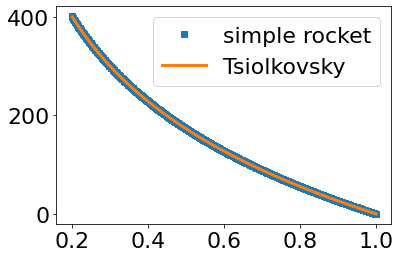

In [4]:
u=250# m/s9.81*80
dmdt = 0.1
dv = np.linspace(0,400,500)
mo = 1
mf = np.exp(-dv/u) # Tsiolkovsky

plt.plot(sol[:,2]/m0,sol[:,1],'s',label='simple rocket')
plt.plot(mf,dv, label='Tsiolkovsky')
plt.legend();
#plt.plot(0.05/0.25,398,'s')

2. You should have a converged solution for integrating `simplerocket`. Now, create a more relastic function, `rocket` that incorporates gravity and drag and returns the velocity, $v$, the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using eqn (1). Where the mass rate change $\frac{dm}{dt}$ and the propellent speed $u$ are constants. The average velocity of gun powder propellent used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = 
\left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt}-g-\frac{c}{m}v^2 \\ \frac{dm}{dt} \end{array}\right]$

Use [two integration methods](../notebooks/03_Get_Oscillations.ipynb) to integrate the `rocket` function, one explicit method and one implicit method. Demonstrate that the solutions converge to equation (2.b) the Tsiolkovsky equation. Use an initial state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s, . 

Compare solutions between the `simplerocket` and `rocket` integration, what is the height reached when the mass reaches $m_{f} = 0.05~kg?$

In [5]:
def rocket(state,dmdt=0.05, u=250,c=0.18e-3):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    c : drag constant for a rocket set to 0.18e-3 kg/m
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    g=9.81
    dstate = np.zeros(np.shape(state))
    dstate = np.array([state[1], (u/state[2]*dmdt-g-c/state[2]*state[1]**2), -dmdt])
    return dstate

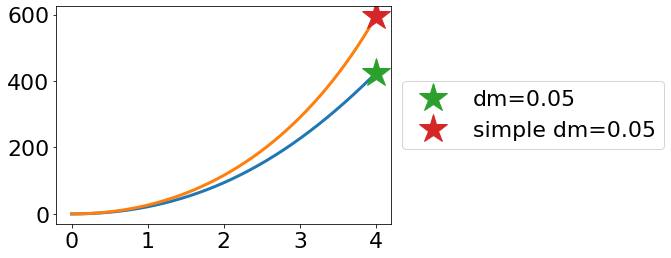

In [6]:
m0=0.25
mf=0.05
dm=0.05
t = np.linspace(0,(m0-mf)/dm,500)
dt=t[1]-t[0]
sim= np.zeros((len(t),3))
sol = np.zeros((len(t),3))
sol[0,2]=m0
sim[0,2]=m0
for i in range(0,len(t)-1):
    sol[i+1] = sol[i]+rocket(sol[i],dmdt=dm)*dt
    sim[i+1] = sim[i]+simplerocket(sim[i],dmdt=dm)*dt

sol[-1,0]
plt.plot(t,sol[:,0])
plt.plot(t,sim[:,0])
plt.plot(t[-1],sol[-1,0],'*',markersize=30,label='dm={:.2f}'.format(dm))
plt.plot(t[-1],sim[-1,0],'*',markersize=30,label='simple dm={:.2f}'.format(dm))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

3. Solve for the mass change rate that results in detonation at a height of 300 meters. Create a function `f_dm` that returns the final height of the firework when it reaches $m_{f}=0.05~kg$. The inputs should be 

$f_{m}= f_{m}(\frac{dm}{dt},~parameters)$

where $\frac{dm}{dt}$ is the variable we are using to find a root and $parameters$ are the known values, `m0=0.25, c=0.18e-3, u=250`. When $f_{m}(\frac{dm}{dt}) = 0$, we have found the correct root. 

Plot the height as a function of time and use a star to denote detonation at the correct height with a `'*'`-marker

Approach the solution in two steps, use the incremental search [`incsearch`](../notebooks/04_Getting_to_the_root.ipynb) with 5-10 sub-intervals _we want to limit the number of times we call the function_. Then, use the modified secant method to find the true root of the function.

a. Use the incremental search to find the two closest mass change rates within the interval $\frac{dm}{dt}=0.05-0.4~kg/s.$

b. Use the modified secant method to find the root of the function $f_{m}$.

c. Plot your solution for the height as a function of time and indicate the detonation with a `*`-marker.

In [7]:
def f_m(dmdt,m0=0.25, c=0.18e-3, u=250):
    ''' define a function f_m(dmdt) that returns 
    height_desired-height_predicted[-1]
    here, the time span is based upon the value of dmdt
    
    arguments:
    ---------
    dmdt: the unknown mass change rate
    m0: the known initial mass
    c: the known drag in kg/m
    u: the known speed of the propellent
    
    returns:
    --------
    error: the difference between height_desired and height_predicted[-1]
        when f_m(dmdt)= 0, the correct mass change rate was chosen
    '''
    mf=0.05
    t = np.linspace(0,(m0-mf)/dmdt,500)
    dt=t[1]-t[0]
    sol = np.zeros((len(t),3))
    sol[0,2]=m0
    for i in range(0,len(t)-1):
        sol[i+1] = sol[i]+rocket(sol[i],dmdt=dmdt,c=c,u=u)*dt
    error=300-sol[-1,0]
    return error

In [8]:
f_m(0.1)

53.02675941081122

In [9]:
def mod_secant(func,dx,x0,es=0.0001,maxit=50):
    '''mod_secant: Modified secant root location zeroes
    root,[fx,ea,iter]=mod_secant(func,dfunc,xr,es,maxit,p1,p2,...):
    uses modified secant method to find the root of func
    arguments:
    ----------
    func = name of function
    dx = perturbation fraction
    xr = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by function
    returns:
    --------
    root = real root
    fx = func evaluated at root
    ea = approximate relative error ( )
    iter = number of iterations'''

    iter = 0;
    xr=x0
    for iter in range(0,maxit):
        xrold = xr;
        dfunc=(func(xr+dx)-func(xr))/dx;
        xr = xr - func(xr)/dfunc;
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100;
        else:
            ea = abs((xr - xrold)/1) * 100;
        if ea <= es:
            break
    return xr,[func(xr),ea,iter]

In [10]:
mod_secant(f_m,0.05,0.01)

(0.0788451731625809, [6.274610984746687e-05, 7.738688150692959e-05, 19])

In [11]:
f_m(0.078845173)

6.225073320820229e-05

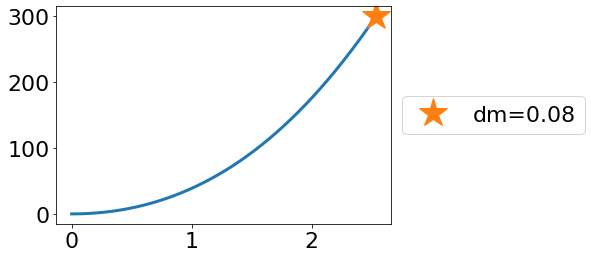

In [12]:
m0=0.25
mf=0.05
dm=0.078845173
t = np.linspace(0,(m0-mf)/dm,500)
dt=t[1]-t[0]
sol = np.zeros((len(t),3))
sol[0,2]=m0
for i in range(0,len(t)-1):
    sol[i+1] = sol[i]+rocket(sol[i],dmdt=dm)*dt
sol[-1,0]
plt.plot(t,sol[:,0])
plt.plot(t[-1],sol[-1,0],'*',markersize=30,label='dm={:.2f}'.format(dm))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## References

1. Math 24 _Rocket Motion_. <https://www.math24.net/rocket-motion/\>

2. Kasdin and Paley. _Engineering Dynamics_. [ch 6-Linear Momentum of a Multiparticle System pp234-235](https://www.jstor.org/stable/j.ctvcm4ggj.9) Princeton University Press 

3. <https://en.wikipedia.org/wiki/Specific_impulse>

4. <https://www.apogeerockets.com/Rocket_Motors/Estes_Motors/13mm_Motors/Estes_13mm_1_4A3-3T>